In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("mushrooms.csv")
df.shape

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
X = df.drop(columns='class')
y = df['class']

X_encoded = pd.get_dummies(X , prefix_sep = '__')
y_encoded = LabelEncoder().fit_transform(y)

X_scaled = StandardScaler().fit_transform(X_encoded)

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y_encoded , test_size = 0.3 , random_state = 101)

In [17]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#import time

In [18]:
#start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train , y_train)
##stop = time.process_time()
#print(stop - start)

In [19]:
y_pred = model.predict(X_test)

In [21]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred)) # This is %100 true scores but with too many features. So I'll drop some features.(I'll do feature selection.)

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Feature Importance

In [24]:
import matplotlib.pyplot as plt

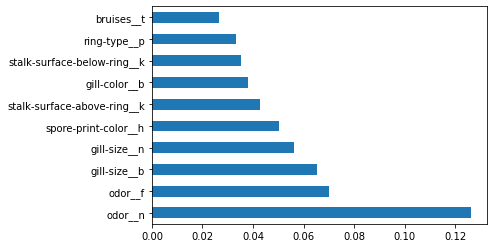

In [36]:
feature_imp = pd.Series(model.feature_importances_ , index = X_encoded.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
plt.show()

In [38]:
best_features = feature_imp.nlargest(4).index

In [43]:
X_reduced = X_encoded[best_features]
Xr_scaled = StandardScaler().fit_transform(X_reduced)

Xr_train , Xr_test , yr_train , yr_test = train_test_split(Xr_scaled , y_encoded , test_size = 0.3 , random_state = 101)

In [44]:
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train , yr_train)

r_y_pred = rmodel.predict(Xr_test)

In [45]:
print(confusion_matrix(yr_test , r_y_pred))
print(classification_report(yr_test , r_y_pred)) # 0.97 scores with only 4 features. Its so important and moreee faster than before. Feature selection is a important thing...

[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [ ]:
# Done